# Laplacian of Gaussian(LoG) Filter in Python

## Table of Contents
* [Laplacian of Gaussian Filter](#log)
* [Laplacian Filter](#lap)
* [Gaussian Filter](#gaus)
* [Python Implementation](#Implementation)
* [Applying the Filters](#Apply)

<a name="log"></a>
## Laplacian of Gaussian Filter

Laplacian of Gaussian Filter is an operator for modifying an input image by first applying a gaussian filter and then a laplacian operator.

The purpose of a gaussian filter is to blur the image based on the given sigma ($\sigma$).

It then applies the laplacian operator for sharpening the blurred image. The operator is controlled by giving the ($\sigma$) value.

$$ \nabla^2h(x,y) = \frac{\partial^2h(x,y)}{\partial^2(x)} + \frac{\partial^2h(x,y)}{\partial^2(y)} $$

$$ \nabla^2h(x,y) = \frac{1}{2\pi\sigma^4}(x^2 + y^2 - 2\sigma^2) e^{-\frac{x^2+y^2}{2\sigma^2}} $$

The above formula is applied for an input image in spatial domain.

However, if we want to apply LoG in frequency domain, the formula becomes:

$$H(u,v)= e^{-\frac{u^2+u^2}{2\sigma^2}} = e^{-\frac{D(u,v)^2}{2\sigma^2}} $$

$$F[\nabla^2h(x,y)] = -D(u,v)^2H(u,v)F(u,v) $$ 

This last formula uses element-wise matrix multiplication.

<a id="lap"></a>
## Laplacian Filter

We can directly sharpen an input image by using only the laplacian operator without taking the advantage of gaussian operator.

The laplacian operator is the addition of the second derivative of a given image with respect to its $x$ and $y$ components. It is defined as follows:

$$ \Delta^2G(x,y) = \frac{\partial^2G(x,y)}{\partial^2(x)} + \frac{\partial^2G(x,y)}{\partial^2(y)} $$

The operator can also be in terms of 3x3 matrix and convolve through out the given image in spatial domain.

$$ \begin{bmatrix} 
  0 & -1 & 0\\
  -1 & 4 & -1\\
  0 & -1 & 0
\end{bmatrix} $$

Similarly, we can also apply a laplacian operator in frequency domain as follows:

$$H(u,v)= -(u^2+v^2) = -D(u,v)^2 $$



<a id="gaus"></a>
## Gaussian Filter

The gaussian operator is a way of blurring an input image by controlling it using $\sigma$. You can change the values of $\sigma$.

The operator is defined as:

$$ H(u,v) = e^{\frac{-D(u,v)^2}{2\sigma^2}} $$

It can also be used as a highpass filter to sharpen an image using:

$$ H(u,v) = 1 - e^{\frac{-D(u,v)^2}{2\sigma^2}} $$


In the next section we are going to implement the above operators

<a id="Implementation"></a>
## Python Implementation

Let's first import the common classes.

In [1]:
from CommonClasses.fft import *
from CommonClasses.dct import *
from CommonClasses.walsh import *
from CommonClasses.haar import *

import numpy as np

import matplotlib.pyplot as plt
#%matplotlib inline

#import matplotlib.image as img
#import PIL.Image as Image 
from PIL import Image
import math
import cmath

import time

import csv

from numpy import binary_repr

from fractions import gcd

Here, let's implement the above operators. You can read the comments to see what each function is doing.

In [2]:
def constructDuv(N):
    """Constructs the frequency matrix, D(u,v), of size NxN"""
    u = np.arange(N)
    v = np.arange(N)

    idx = np.where(u>N/2)[0]
    u[idx] = u[idx] - N
    idy = np.where(v>N/2)[0]
    v[idy] = v[idx] - N

    [V,U]= np.meshgrid(v,u)
    D = np.sqrt(U**2 + V**2)
    
    return D

In [3]:
def computeLaplacian(Duv):
    """Computes laplacian operator in the Frequency Domain."""
    #(-4*math.pi)*
    H = -1*(Duv**2)
    return H

In [4]:
def computeGaussian(Duv, sigma):
    """Computes the gaussian operator in Frequency Domain."""
    gausExp = (0.5*(Duv**2)/(sigma**2))
    #H = np.cos(gausExp)-(1j*np.sin(gausExp))
    H = np.exp(-1*gausExp)
    return H

In [5]:
def computeLoG(fftImge, Duv, sigma):
    """Computes the laplacian of gaussian (LoG) of an image in frequency domain."""
    lap = computeLaplacian(Duv)
    gaus = computeGaussian(Duv, sigma)
    LoG = lap * (gaus*fftImge)
    
    return LoG

<a id="Applying"></a>
## Applying The Operators

Now let's try to apply the above function to real images.

In [6]:
imge = Image.open("Images/lena_gray_256.tif") # open an image
imge = np.array(imge)

sigmas = [10, 50, 100]
N = imge.shape[0]
F = FFT.computeFFT(imge)
Duv = constructDuv(N)

finalImges = []
for i, sigma in enumerate(sigmas):
    #lap = F*computeLaplacian(Duv)

    log = computeLoG(F, Duv, sigma)
    finalImges.append(FFT.computeInverseFFT(log))

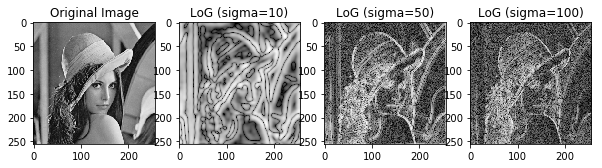

In [7]:
#Display the original and the laplacian & gaussian image.

fig, axarr = plt.subplots(1, 4, figsize=(10, 5))

axarr[0].imshow(imge, cmap=plt.get_cmap('gray'))
axarr[0].set_title('Original Image')

axarr[1].imshow(DFT.normalize2DDFTByLog(finalImges[0]), cmap=plt.get_cmap('gray'))
axarr[1].set_title('LoG (sigma=' + str(sigmas[0]) + ')')

axarr[2].imshow(DFT.normalize2DDFTByLog(finalImges[1]), cmap=plt.get_cmap('gray'))
axarr[2].set_title('LoG (sigma=' + str(sigmas[1]) + ')')

axarr[3].imshow(DFT.normalize2DDFTByLog(finalImges[2]), cmap=plt.get_cmap('gray'))
axarr[3].set_title('LoG (sigma=' + str(sigmas[2]) + ')')

plt.show()

In [12]:
#from scipy.ndimage.filters import gaussian_laplace

#plt.imshow(gaussian_laplace(imge, 1), cmap=plt.get_cmap('gray'))
#plt.show()